# XGBoost in Action

## Importing the libraries

### Step 1: Import Libraries
We start by importing the tools we need to work with data, build the model, and check how well it performs.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb

## Load and Prepare Data

### Step 2: Load the Data
Let's load our dataset from a CSV file so we can use it in Python.

In [2]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# Checking for missing data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Step 3: Separate Features and Target
We split the data into `X` (features used for learning) and `y` (the correct answers we want to predict).

In [5]:
# Splitting data into X and Y
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X: features (input data).

y: labels (target values or outputs).

test_size=0.20: This means 20% of the data will be used for testing, and 80% for training.

X_train: 80% of the features used for training.

X_test: 20% of the features used for testing.

y_train: 80% of the labels used for training.

y_test: 20% of the labels used for testing.

### Step 4: Split into Training and Testing
We split our data into two parts: one to train the model and one to test how well it works.

In [6]:
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Step 5: Build and Train the Model
Now we create our XGBoost model and teach it using the training data.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


### Step 6: Check Accuracy
We check how many predictions the model got right.

In [8]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

✅ 1. model = XGBClassifier()
This creates a new XGBoost Classifier model.

XGBClassifier() comes from the xgboost library.

#### It’s a powerful, fast, and scalable machine learning algorithm often used for classification problems.

✅ 2. model.fit(X_train, y_train)
This trains (or "fits") the model on your training data.

X_train: the input features.

y_train: the corresponding correct labels.

The model will learn patterns in the data to try to predict the labels (y) based on the features (X).

In [9]:
y_pred = model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  79.22077922077922


## Evaluate the Model

In [11]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7922077922077922
Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       100
           1       0.71      0.69      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



## Plot Feature Importance

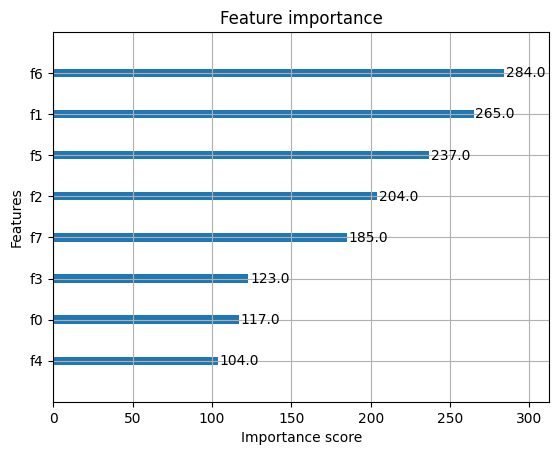

In [12]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model)
plt.show()

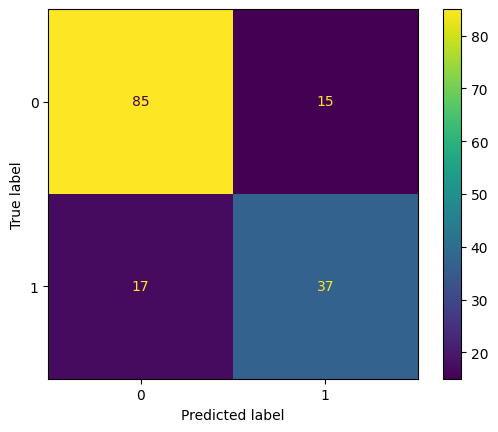

In [15]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


Performance Insights
The matrix suggests your model is better at identifying the negative class (85 correct) than the positive class (37 correct). The 15 false positives and 17 false negatives indicate where your model makes mistakes.

